
<img src=https://www.iteda.cnea.gov.ar/sites/default/files/garland_iteda_logo.png align='left' height=115>

<img src=https://www.facet.unt.edu.ar/facetinforma/wp-content/uploads/sites/9/2015/11/it-OP1-Transparente.png align='right' height=115>


# Análisis Estadístico de Datos

# Teorema Central del Límite

Ejemplo del teorema central del límite. El código simula muchas variables continuas con distribución uniforme entre 0 y 1. Luego construye un histograma de frecuencias con la suma de las variables y lo compara con una distribución Gaussiana.

$X = \sum_{i=1}^{n} X_i, \; X_i \sim \mathrm{U}(0,1)$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Simulación Monte Carlo

Número de variables a sumar

In [2]:
numero_variables = 10

Número de simulaciones

In [3]:
numero_simulaciones = 100000

Generador de números aleatorios

In [4]:
rng = np.random.default_rng()

Arreglo para guardar los datos

In [5]:
datos = []

In [6]:
for i in range(numero_simulaciones):
    # print("Iteración ", i)
    x = rng.random(numero_variables)     # distribución uniforme [0,1)
    # print("x = ", x)
    x_sum = x.sum()
    # print("z = ", z)
    datos.append(x_sum)

## Momentos de Z

In [7]:
mu = numero_variables / 2
print(f'Media: {mu}')

Media: 5.0


In [8]:
sigma = math.sqrt(numero_variables/12)
print(f'Desviación estándar: {sigma}')

Desviación estándar: 0.9128709291752769


## Histograma de frecuencia de Z

In [9]:
xmin, xmax = mu-2*sigma, mu+2*sigma
histo, borde_bin = np.histogram(datos, bins=20, range=[xmin, xmax])
centro_bin = ( borde_bin[0:-1] + borde_bin[1:] ) / 2

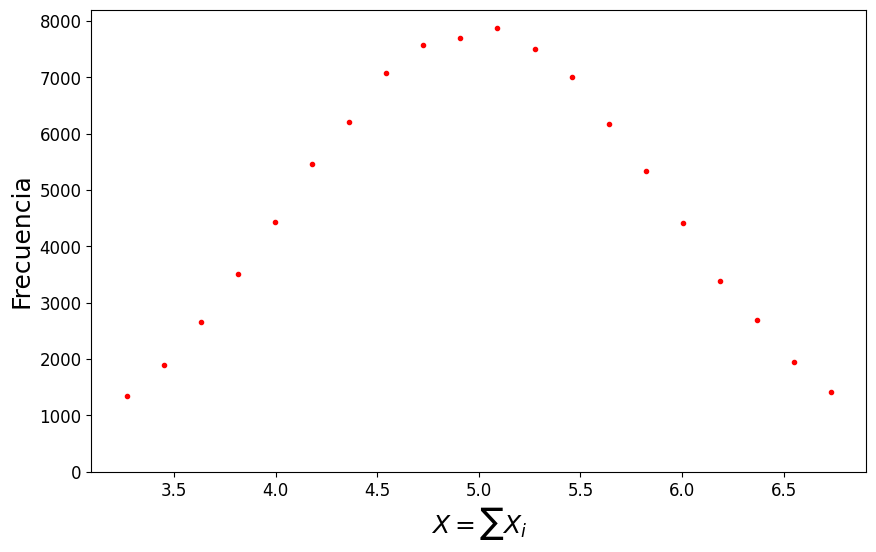

In [10]:
fsize, lsize = 18, 12 # tamaño de fuentes
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel('$X = \sum X_i$', fontsize=fsize)
ax.set_ylabel('Frecuencia', fontsize=fsize)
ax.plot(centro_bin, histo, 'ro', ms='3', label='Simulaciones')
ax.set_ylim(bottom=0)
ax.tick_params(axis='both', which='major', labelsize=lsize)
plt.show()

## Distribución Gaussiana

In [11]:
x = np.linspace(xmin, xmax, 256)

Normalización de la distribución

In [12]:
ancho_bin = borde_bin[1] - borde_bin[0]
factor_escala = numero_simulaciones * ancho_bin
print(factor_escala)

18257.418583505558


In [13]:
y = factor_escala * norm.pdf(x, loc=mu, scale=sigma)

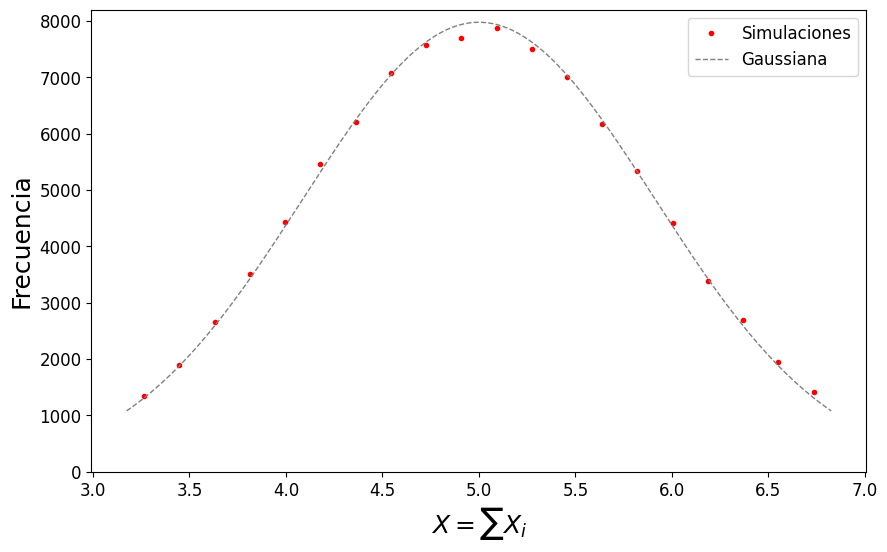

In [14]:
size, lsize = 18, 12 # tamaño de fuentes
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel('$X = \sum X_i$', fontsize=fsize)
ax.set_ylabel('Frecuencia', fontsize=fsize)
ax.plot(centro_bin, histo, 'ro', ms='3', label='Simulaciones')
ax.set_ylim(bottom=0)
ax.tick_params(axis='both', which='major', labelsize=lsize)
ax.plot(x, y, ls='--', lw=1, color='gray', label='Gaussiana')
ax.legend(fontsize=lsize)
plt.show()